# Clustering of sensor data using mean shift

We use the sklearn implementation of the mean shift algorithm.

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import numpy as np
from load_quilt_data import load_data
import clustering_utils as cl
from sklearn.metrics.pairwise import euclidean_distances

### Get sequence data 

In [9]:
node = 'videos'
typ = 'sequences'

X_origin, Y1_origin, Y2_origin, meta_origin = load_data(node, typ)

### Excerpt of cluster with motorcycle as an example

In [10]:
i = 0
moto_x = []
for x, y1,y2, meta in zip(X_origin, Y1_origin, Y2_origin, meta_origin):
    if "MOTORCYCLE" in y1:
        if i == 1:
            moto_x = x
            break
        i += 1

all_x = moto_x[-250:]
#x = all_x[:154] + all_x[170:] # take out one of the clusters to simulate single cluster problem

### Set the parameters for the clustering
For the bandwidth parameter 450 ms were chosen. If the clustering is to be done on the y axis, you can use a bandwidth of b = 2.

In [11]:
b = 450 

### Perform clustering and plot the sensor data

The data is plotted accordingly:
+ x: time in ms
+ y: segment in 1/3m
+ subplot top: sensor strip 0
+ subplot bottom: sensor strip 1
+ filled data points: push
+ unfilled data points: release of sensor
+ colors according to cluster

#### Vertical clusters top and bottom for the two drive throughs

C:\Users\Lisa\Anaconda3\envs\parkhere_ML\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


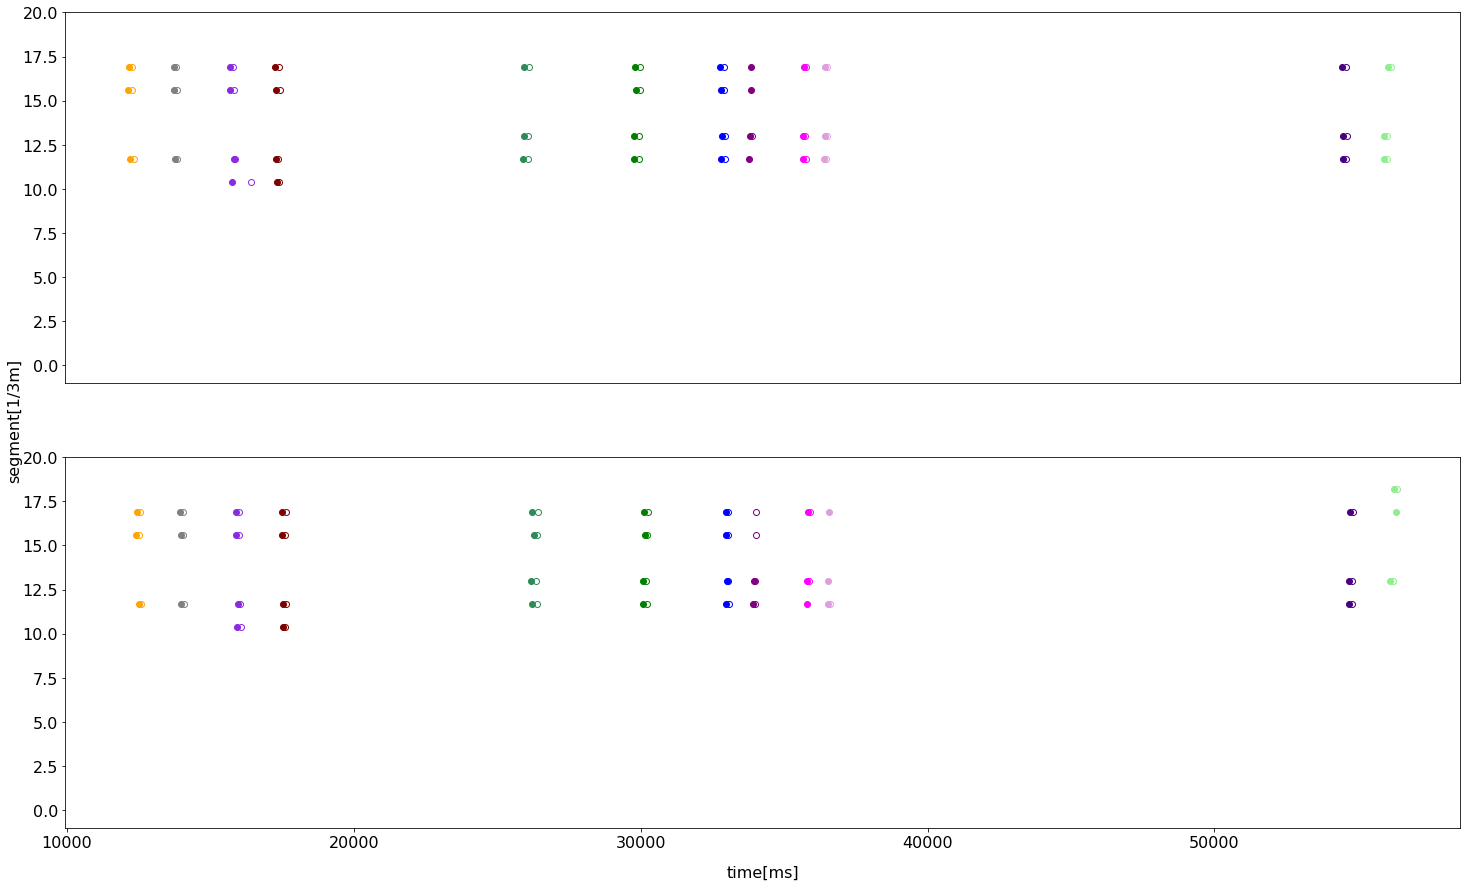

Found 6 clusters.


C:\Users\Lisa\Anaconda3\envs\parkhere_ML\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


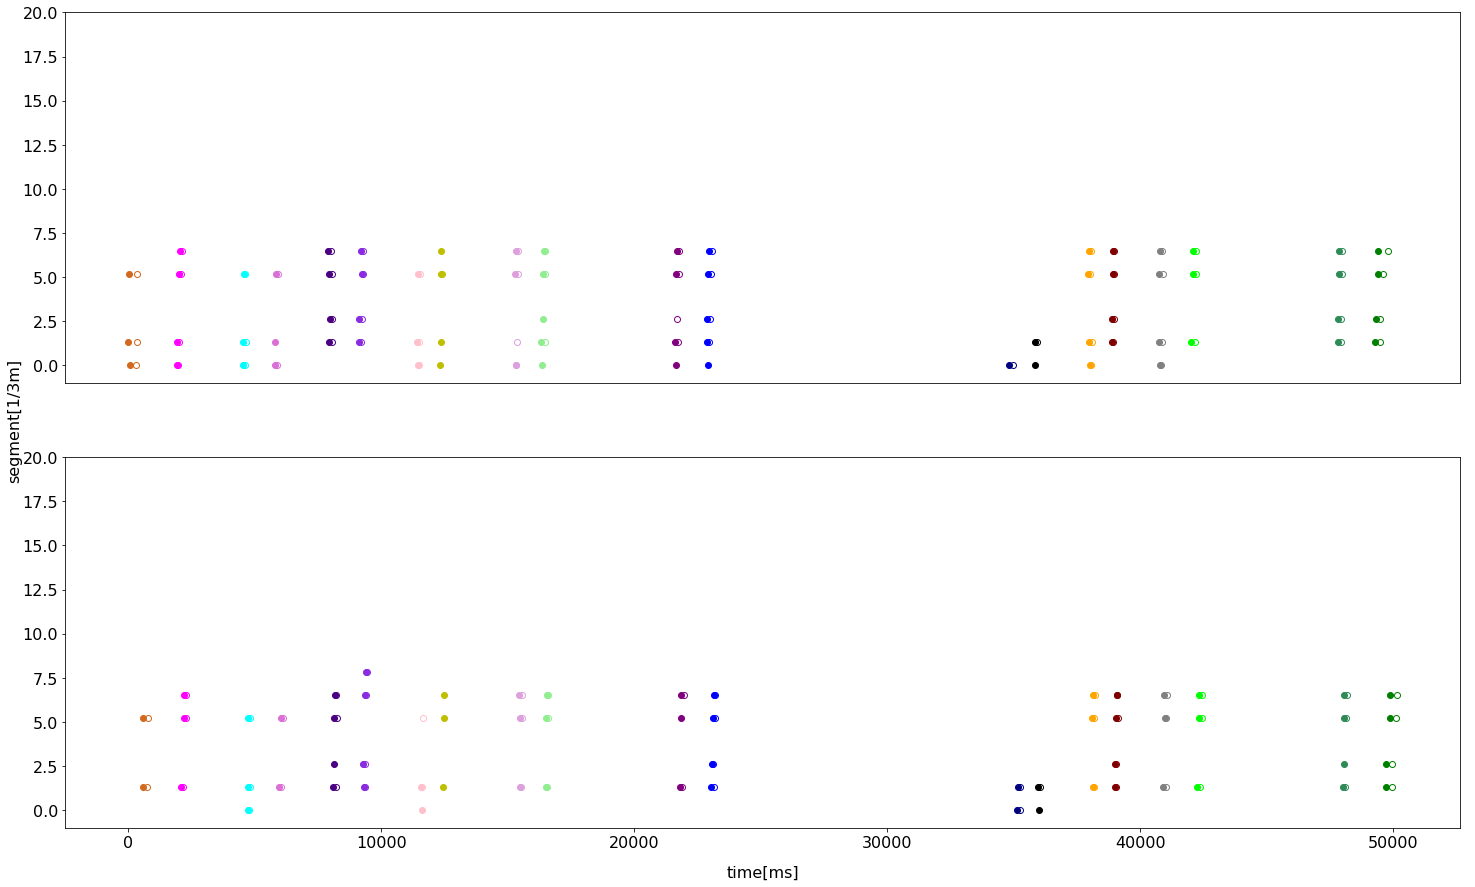

Found 10 clusters.


In [14]:
x_top, x_bottom = cl.seperate_stripes(x)

if x_top == []:
    x_data = cl.cluster_data(b, x_bottom)
elif x_bottom == []:
    x_data = cl.cluster_data(b, x_top)
else:
    x_data = np.concatenate((cl.cluster_data(b, x_top), cl.cluster_data(b, x_bottom)), axis = 0)

#### Vertical clusters merged for both drive throughs

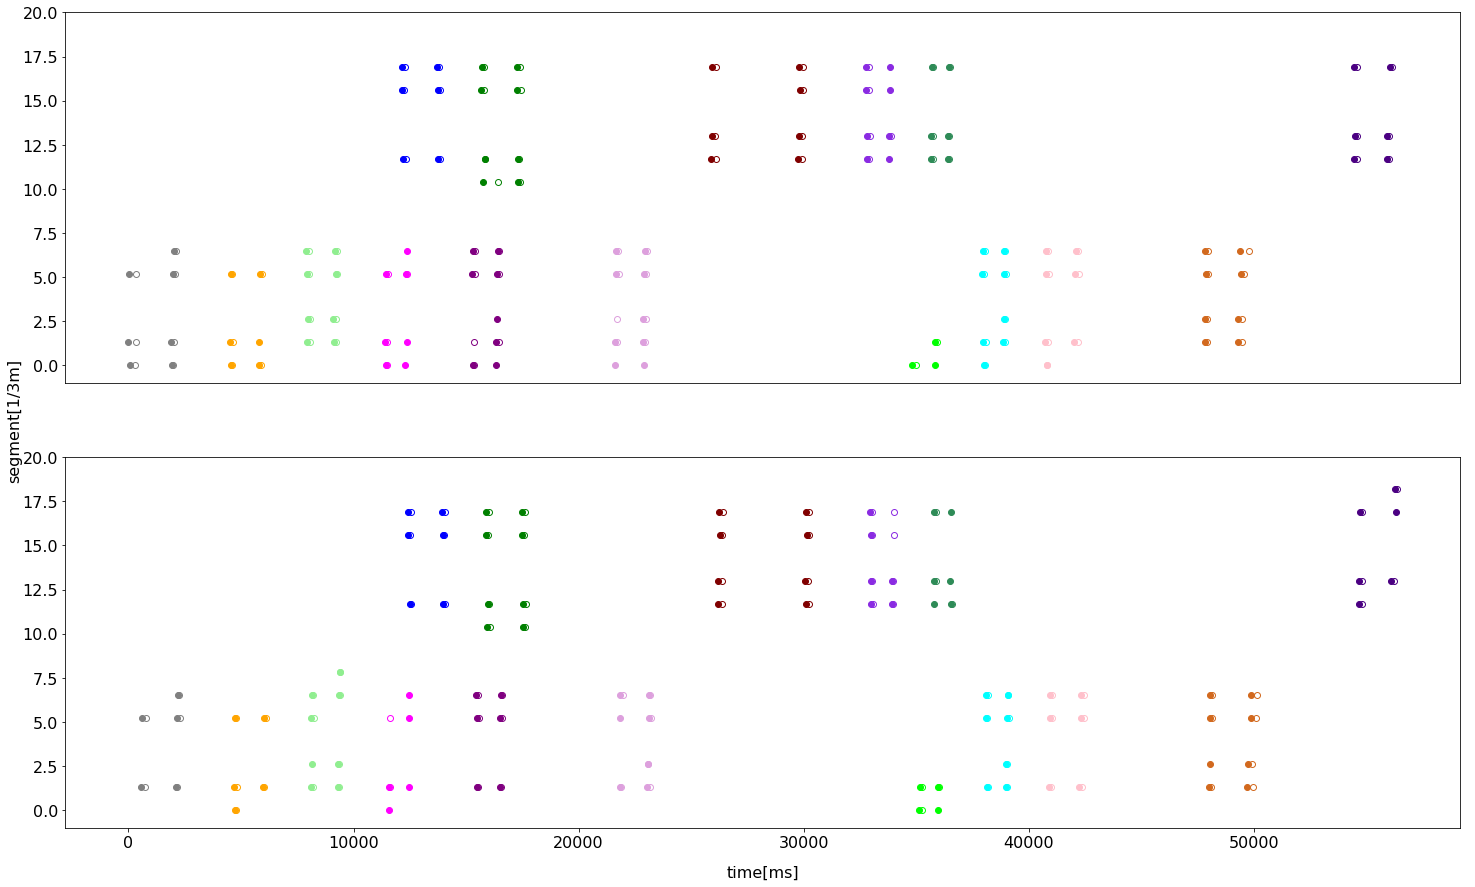

In [15]:
cl.plot_merged_clusters(x_data)